# Context

<b style= "color:skyblue">Saham BBCA.</b> Merupakan salah satu saham Blue Chip, yang banyak dipercaya dan dibeli oleh masyarakat Indonesia. Ada beberapa penjelasan mengapa saham ini merupakan salah satu saham yang terbaik untuk dibeli dalam skala <i>Long Term Hold</i>
<br> 
<b style="color:orange">Dalam analisis ini akan membuktikan apakah pernyataan tersebut SESUAI atau KURANG SESUAI terhadap saham BBCA.</b>

## 5W-1H, Prediksi Saham <b style= "color:skyblue">BBCA</b>
### What?
<b>Apa yang membuat saham BBCA menarik untuk dianalisis?</b> Tentu saja karena kinerja keuangan bank ini yang masuk kedalam golongan kuat dan konsisten dalam pertumbuhan adalah dasar utama mengapa saham ini menarik untuk dianalisis
<br>

### Who?
<b>Siapa saja yang dapat memperhatikan saham BBCA?</b> Dari segi investor, maka investor yang mencari kestabilan dan potensi pertumbuhan jangka panjang harus memperhatikan saham ini, karena saham ini bersifat <i>Low Risk, Long Term</i>
<br>

### When?
<b>Kapan waktu terbaik untuk membeli saham BBCA?</b> Tentu saja bagian ini menjadi pertanyaan paling menarik. Secara general maka saham ini memiliki waktu terbaik untuk dibeli ketika volatilitas rendah dan terjadi indikasi pertumbuhan ekonomi
<br>

### Where?
<b>Di mana kita bisa mendapatkan analisi saham BBCA?</b> Secara general maka kita dapat mendapat informasi umum seputar saham ini dalam situs web resmi <u>BEI (Bursa Efek Indonesia)</u>
<br>

### Why?
<b>Mengapa saham ini penting untuk kita prediksi?</b> Tentu saja karena saham ini memiliki banyak peminat sehingga diharapkan analisis dan prediksi ini dapat memberikan <i>Impact</i> Yang besar kepada banyak investor

### How?
<b>Bagaimana cara analisis saham yang akan dilakukan?</b> Secara umum maka anda dapat melakukan analisis saham secara fundamental, namun pada sesi analisis ini akan menggunakan <i>Machine Learning, Deep Learning yaitu dengan metode RNN (Reccurent Neural Network), LSTM (Long Short Term Network)</i>
<br>

### Ada beberapa Objektif yang akan dilakukan dalam analisis ini
<ol>
    <li>Analysis Preparation</li>
    <li>Data Cleansing</li>
    <li>Exploratory Data Analysis</li>
    <li>Normalization</li>
    <li>Data Training and Data Testing</li>
    <li>LSTM Methode</li>
    <li>Prediction</li>
    <li>Accuration Evaluation</li>
    <li>Comparison</li>
    <li>Insight</li>
</ol>

# Analysis Prearation

## Libraries

In [1]:
# Processing Data
import pandas as pd

# numerical Calculation
import numpy as np

# Math Operation
import math

# Date Formating
import datetime as dt

# Machine Learning Metrics Pre-Processing
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Building Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

# Create Iterator
from itertools import cycle

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Import Dataset

In [2]:
dfBBCA = pd.read_csv("Data Historis BBCA.csv")
dfBBCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1151 non-null   object 
 1   Terakhir    1151 non-null   float64
 2   Pembukaan   1151 non-null   float64
 3   Tertinggi   1151 non-null   float64
 4   Terendah    1151 non-null   float64
 5   Vol.        1151 non-null   object 
 6   Perubahan%  1151 non-null   object 
dtypes: float64(4), object(3)
memory usage: 63.1+ KB


In [3]:
dfBBCA.shape

(1151, 7)

In [4]:
dfBBCA.head(15).style.background_gradient(cmap = "mako")

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,24/06/2024,9.675000,9.600000,9.750000,9.575000,"37,33M","0,78%"
1,21/06/2024,9.600000,9.475000,9.675000,9.400000,"167,76M","1,86%"
2,20/06/2024,9.425000,9.150000,9.425000,9.100000,"81,47M","4,14%"
3,19/06/2024,9.050000,9.250000,9.250000,9.050000,"100,05M","-1,63%"
4,14/06/2024,9.200000,9.200000,9.250000,9.100000,"52,99M","0,00%"
5,13/06/2024,9.200000,9.475000,9.475000,9.200000,"84,65M","-0,54%"
6,12/06/2024,9.250000,9.300000,9.325000,9.250000,"49,79M","-0,54%"
7,11/06/2024,9.300000,9.550000,9.550000,9.300000,"68,69M","-2,36%"
8,10/06/2024,9.525000,9.500000,9.525000,9.450000,"45,58M","2,14%"
9,07/06/2024,9.325000,9.500000,9.500000,9.325000,"51,60M","-1,58%"


# Data Cleansing and Preparation

## Get Data General Information

In [5]:
dfBBCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1151 non-null   object 
 1   Terakhir    1151 non-null   float64
 2   Pembukaan   1151 non-null   float64
 3   Tertinggi   1151 non-null   float64
 4   Terendah    1151 non-null   float64
 5   Vol.        1151 non-null   object 
 6   Perubahan%  1151 non-null   object 
dtypes: float64(4), object(3)
memory usage: 63.1+ KB


In [6]:
# Rename columns
dfBBCA.rename(columns={"Tanggal":"date","Pembukaan":"open","Tertinggi":"high","Terendah":"low","Terakhir":"close"}, inplace= True)
dfBBCA.head()

,date,close,open,high,low,Vol.,Perubahan%
0,24/06/2024,9.675,9.600,9.750,9.575,"37,33M","0,78%"
1,21/06/2024,9.600,9.475,9.675,9.400,"167,76M","1,86%"
2,20/06/2024,9.425,9.150,9.425,9.100,"81,47M","4,14%"
3,19/06/2024,9.050,9.250,9.250,9.050,"100,05M","-1,63%"
4,14/06/2024,9.200,9.200,9.250,9.100,"52,99M","0,00%"


In [7]:
# Convert date from object to Datetime
dfBBCA['date'] = pd.to_datetime(dfBBCA.date)

# Convert "Vol." to numerical values (millions)
dfBBCA["Vol."] = dfBBCA["Vol."].str.replace('M', '').str.replace(',', '.').astype(float) * 1e6

# Convert "Perubahan%" to numerical values
dfBBCA["Perubahan%"] = dfBBCA["Perubahan%"].str.replace('%', '').str.replace(',', '.').astype(float)

# Calculate IQR
Q1 = dfBBCA["Perubahan%"].quantile(0.25)
Q3 = dfBBCA["Perubahan%"].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dfBBCA[(dfBBCA["Perubahan%"] < lower_bound) | (dfBBCA["Perubahan%"] > upper_bound)]

# Handle outliers: Here we choose to remove them
dfBBCA = dfBBCA[~((dfBBCA["Perubahan%"] < lower_bound) | (dfBBCA["Perubahan%"] > upper_bound))]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12256\1468023917.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfBBCA['date'] = pd.to_datetime(dfBBCA.date)


In [8]:
# Print dataframe
dfBBCA.head().style.background_gradient(cmap='mako')

,date,close,open,high,low,Vol.,Perubahan%
0,2024-06-24 00:00:00,9.675000,9.600000,9.750000,9.575000,37330000.000000,0.780000
1,2024-06-21 00:00:00,9.600000,9.475000,9.675000,9.400000,167760000.000000,1.860000
3,2024-06-19 00:00:00,9.050000,9.250000,9.250000,9.050000,100050000.000000,-1.630000
4,2024-06-14 00:00:00,9.200000,9.200000,9.250000,9.100000,52990000.000000,0.000000
5,2024-06-13 00:00:00,9.200000,9.475000,9.475000,9.200000,84650000.000000,-0.540000


## Sorting Dataset by Date

In [9]:
dfBBCA.sort_values(by='date', inplace=True)
dfBBCA.head().style.background_gradient(cmap='mako')

,date,close,open,high,low,Vol.,Perubahan%
1149,2019-09-20 00:00:00,5.990000,6.050000,6.050000,5.990000,133430000.000000,-0.660000
1148,2019-09-23 00:00:00,6.025000,6.030000,6.030000,6.000000,47230000.000000,0.580000
1147,2019-09-24 00:00:00,5.945000,5.980000,6.000000,5.940000,79720000.000000,-1.330000
1146,2019-09-25 00:00:00,5.935000,5.900000,5.935000,5.780000,88620000.000000,-0.170000
1145,2019-09-26 00:00:00,6.060000,6.000000,6.060000,5.970000,109860000.000000,2.110000


In [10]:
dfBBCA.shape

(1093, 7)

## Handling Missing Value

In [11]:
# Mencari missing value
missing_value = pd.isnull(dfBBCA).sum()
missing_value

date          0
close         0
open          0
high          0
low           0
Vol.          0
Perubahan%    0
dtype: int64

In [12]:
# Rasio Missing Values
ratio_missing_value = missing_value.div(len(dfBBCA))
ratio_missing_value

date          0.0
close         0.0
open          0.0
high          0.0
low           0.0
Vol.          0.0
Perubahan%    0.0
dtype: float64

Tidak ada data yang memiliki missing value sehingga tidak perlu melakukan drop data

In [13]:
dfBBCA.duplicated()

1149    False
1148    False
1147    False
1146    False
1145    False
        ...  
5       False
4       False
3       False
1       False
0       False
Length: 1093, dtype: bool

In [14]:
dfBBCA.duplicated().sum()

0

# Exploratory Data Analysis

In [15]:
dfBBCA.head().style.background_gradient(cmap='mako')

,date,close,open,high,low,Vol.,Perubahan%
1149,2019-09-20 00:00:00,5.990000,6.050000,6.050000,5.990000,133430000.000000,-0.660000
1148,2019-09-23 00:00:00,6.025000,6.030000,6.030000,6.000000,47230000.000000,0.580000
1147,2019-09-24 00:00:00,5.945000,5.980000,6.000000,5.940000,79720000.000000,-1.330000
1146,2019-09-25 00:00:00,5.935000,5.900000,5.935000,5.780000,88620000.000000,-0.170000
1145,2019-09-26 00:00:00,6.060000,6.000000,6.060000,5.970000,109860000.000000,2.110000


In [16]:
dfBBCA.tail().style.background_gradient(cmap='mako')

,date,close,open,high,low,Vol.,Perubahan%
5,2024-06-13 00:00:00,9.200000,9.475000,9.475000,9.200000,84650000.000000,-0.540000
4,2024-06-14 00:00:00,9.200000,9.200000,9.250000,9.100000,52990000.000000,0.000000
3,2024-06-19 00:00:00,9.050000,9.250000,9.250000,9.050000,100050000.000000,-1.630000
1,2024-06-21 00:00:00,9.600000,9.475000,9.675000,9.400000,167760000.000000,1.860000
0,2024-06-24 00:00:00,9.675000,9.600000,9.750000,9.575000,37330000.000000,0.780000


## Duration of Dataset

In [17]:
print("Starting date: ",dfBBCA.iloc[0][0])
print("Ending date: ", dfBBCA.iloc[-1][0])
print("Duration: ", dfBBCA.iloc[-1][0]-dfBBCA.iloc[0][0])

Starting date:  2019-09-20 00:00:00
Ending date:  2024-06-24 00:00:00
Duration:  1739 days 00:00:00


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12256\1902600191.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Starting date: ",dfBBCA.iloc[0][0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12256\1902600191.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ending date: ", dfBBCA.iloc[-1][0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12256\1902600191.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("D

## Descriptive Analytics

In [18]:
dfBBCA.describe().style.background_gradient(cmap='mako')

,date,close,open,high,low,Vol.,Perubahan%
count,1093,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,2022-02-08 00:26:20.969807872,7.586757,7.591592,7.654094,7.522251,83715690.759378,0.013559
min,2019-09-20 00:00:00,4.500000,4.450000,4.800000,4.325000,11410000.000000,-3.140000
25%,2020-12-17 00:00:00,6.405000,6.410000,6.455000,6.355000,56390000.000000,-0.760000
50%,2022-02-09 00:00:00,7.500000,7.475000,7.550000,7.400000,73310000.000000,0.000000
75%,2023-04-04 00:00:00,8.825000,8.825000,8.875000,8.750000,97290000.000000,0.700000
max,2024-06-24 00:00:00,10.175000,10.400000,10.400000,10.150000,756430000.000000,3.140000
std,nan,1.313290,1.310422,1.313900,1.313491,48802196.998407,1.187312


## Visualization

In [19]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

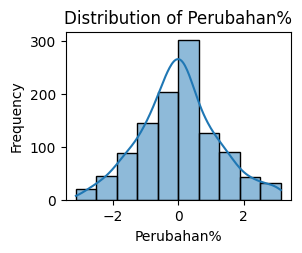

In [20]:
plt.subplot(2, 2, 1)
sns.histplot(dfBBCA["Perubahan%"], bins=10, kde=True)
plt.title("Distribution of Perubahan%")
plt.xlabel("Perubahan%")
plt.ylabel("Frequency")

(array([17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

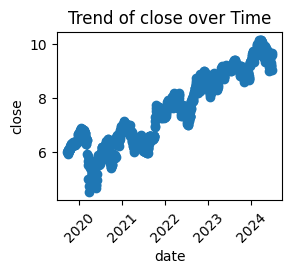

In [21]:
# Trends over time for "close"
plt.subplot(2, 2, 2)
plt.plot(dfBBCA["date"], dfBBCA["close"], marker='o')
plt.title("Trend of close over Time")
plt.xlabel("date")
plt.ylabel("close")
plt.xticks(rotation=45)

(array([17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

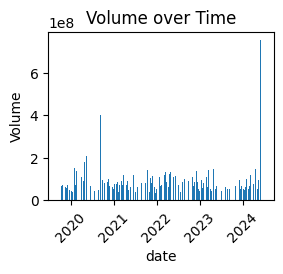

In [22]:
# Volume analysis
plt.subplot(2, 2, 3)
plt.bar(dfBBCA["date"], dfBBCA["Vol."])
plt.title("Volume over Time")
plt.xlabel("date")
plt.ylabel("Volume")
plt.xticks(rotation=45)

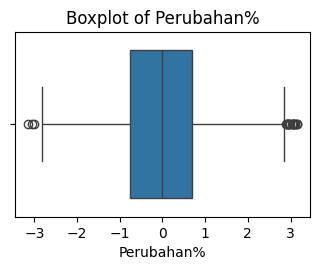

In [23]:
# Boxplot for detecting outliers in "Perubahan%"
plt.subplot(2, 2, 4)
sns.boxplot(x=dfBBCA["Perubahan%"])
plt.title("Boxplot of Perubahan%")

plt.tight_layout()
plt.show()

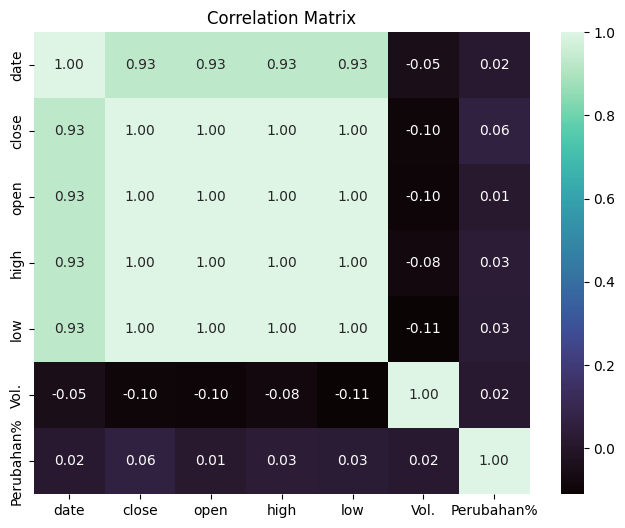

In [24]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dfBBCA.corr(), annot=True, cmap='mako', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

<b>1 = STRONG(+) CORRELATION | 0 = NO CORRELATION | -1 = STRONG(-) CORRELATION</b>
<ol>
    <li><b>Terakhir and Pembukaan, Tertinggi, Terendah</b>, Ini adalah semua bagian dari saham dengan tingkat korelasi tinggi dikarenakan mereka bergerak ke arah yang sama</li>
    <li><b>Perubahan</b>, Mengindikasikan perubahan persentase dalam harga saham yang berkemungkinan memiliki korelasi bervariasi. Seperti contoh, bila saham mengalami <i>Open and Close</i> dengan value yang mirip maka korelasi akan lebih rendah.</li>
    <li><b>Volume</b>, Volume tidak selalu memiliki korelasi yang tinggi terhadap pergerakan harga. Terkadang volume yang tinggi bisa berkoinsiden dengan harga fluktuatif tinggi.</li>
</ol>

# Normalization

In [25]:
closedf = dfBBCA[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1093, 2)


In [26]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1093, 1)


# Data Training and Data Testing

## Data Training : Data Testing = 85:15

In [27]:
training_size=int(len(closedf)*0.85)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (929, 1)
test_data:  (164, 1)


### Create New Dataset For Time Series Predicition

In [28]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (913, 15)
y_train:  (913,)
X_test:  (148, 15)
y_test (148,)


# LSTM Methode

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (913, 15, 1)
X_test:  (148, 15, 1)


## Model Structures

In [31]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=5,verbose=1)

Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0353 - val_loss: 0.0018
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0021 - val_loss: 0.0086
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0027 - val_loss: 0.0065
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 9/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0014 - val_loss: 9.4494e-04
Epoch 10/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0013 - val_loss: 9.4708e-04
Epoch 11/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 12/100
183/183 ━━━━━━━━

# Prediction

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


((913, 1), (148, 1))

In [35]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

# Accuration Evaluation

## Evaluation Testing on RMSE and MAE
Methode untuk mengevaluasi akurasi dari model prediksi terutama dalam metode menggunakan analisis regresi. Mengkuantifikasi perbedaan antara data valid dengan data prediksi

In [36]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.11586320735484258
Train data MSE:  0.013424282818551249
Test data MAE:  0.08628403351314749
-------------------------------------------------------------------------------------
Test data RMSE:  0.14036021361355214
Test data MSE:  0.01970098956564199
Test data MAE:  0.10733566928554225


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors

In [37]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.991043941735877
Test data explained variance regression score: 0.9028374504912484


<b>1 = Accurate | 0 or < 0 = Inaccurate</b> R^2 Adalah pengukuran stastikal untuk merepresentasikan proporsi dari sebuah variance untuk variable dependent atau dalam kasus ini variable dalam sebuah model regresi.

In [38]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9897962609522858
Test data R2 score: 0.8902099854927583


## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
Mean Gamma Deviance regression loss (MGD) and Mean Poisson Deviance (MPD) Merupakan sebuah metode analisis untuk regresi yang mengacu pada <i>Loss Function Tasks</i> yang digunakan untuk modelling variable response dengan distribusi gamma atau poisson.
<br>
<br>
<i><b>Mean Gamma Deviance</b></i>, biasa digunakan pada model yang berkarakteristik <b><i>Continoues</i></b>. Saham adalah data yang berkarakteristik continuous, sebuah data secara timestamp atau secara kurun waktu terus bergerak.
<br>
<br>
<i><b>Mean Poisson Deviance</b></i>, umum digunakan untuk modelling data hitungan, dimana sebuah variable response mewakili jumlah kejadian dalam interval waktu tertentu
<br>
<b>MPD</b> Mengevaluasi kinerja model dengan mengukur perbedaan antara prediction dengan actual values.
<br>
<br>
<lo>
    <li><b style="color:aquamarine">Nilai Deviance yang lebih rendah:</b></li> Nilai MGD atau MPD yang lebih rendah menginterpretasikan kinerja model yang baik, dimana prediksi dan aktual tidak jauh berbeda
    <li><b style="color:aquamarine">Perbandingan Model:</b></li> MPD dan MGD juga berguna untuk membandingkan beberapa model atau mengoptimalkan parameter saat variable response mengikuti gamma atau poisson
    <li><b style="color:aquamarine">Meminimalisir Kerugian:</b></li> Optimalisasi yang dilakukan selama training model meminimalisir kerugian yang berpotensi ditimbulkan
</lo>

In [39]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00028055128903895524
Test data MGD:  0.00022604702934788697
----------------------------------------------------------------------
Train data MPD:  0.0019038550897567158
Test data MPD:  0.00210861851544498


# Comparison

## Comparison Between Original Stock Close Price and Predicted Close Price

In [40]:
# shift train predictions for plotting

look_back = time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(closedf) - 1, :] = (
    test_predict
)
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(
    [
        "Original close price",
        "Train predicted close price",
        "Test predicted close price",
    ]
)


plotdf = pd.DataFrame(
    {
        "date": close_stock["date"],
        "original_close": close_stock["close"],
        "train_predicted_close": trainPredictPlot.reshape(1, -1)[0].tolist(),
        "test_predicted_close": testPredictPlot.reshape(1, -1)[0].tolist(),
    }
)

fig = px.line(
    plotdf,
    x=plotdf["date"],
    y=[
        plotdf["original_close"],
        plotdf["train_predicted_close"],
        plotdf["test_predicted_close"],
    ],
    labels={"value": "Stock price", "date": "Date"},
)
fig.update_layout(
    title_text="Comparision between original close price vs predicted close price",
    plot_bgcolor="white",
    font_size=15,
    font_color="black",
    legend_title_text="Close Price",
)
fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1093, 1)
Test predicted data:  (1093, 1)


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## Predicting Next 10 Days

In [41]:
x_input = test_data[len(test_data) - time_step :].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
pred_days = 10
while i < pred_days:

    if len(temp_input) > time_step:

        x_input = np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)

        lst_output.extend(yhat.tolist())
        i = i + 1

    else:

        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i = i + 1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


## Plotting Last 15 Days and Next Predicted 10 Days

In [42]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [43]:
temp_mat = np.empty((len(last_days) + pred_days + 1, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0 : time_step + 1] = (
    scaler.inverse_transform(closedf[len(closedf) - time_step :])
    .reshape(1, -1)
    .tolist()[0]
)
next_predicted_days_value[time_step + 1 :] = (
    scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))
    .reshape(1, -1)
    .tolist()[0]
)

new_pred_plot = pd.DataFrame(
    {
        "last_original_days_value": last_original_days_value,
        "next_predicted_days_value": next_predicted_days_value,
    }
)

names = cycle(["Last 15 days close price", "Predicted next 10 days close price"])

fig = px.line(
    new_pred_plot,
    x=new_pred_plot.index,
    y=[
        new_pred_plot["last_original_days_value"],
        new_pred_plot["next_predicted_days_value"],
    ],
    labels={"value": "Stock price", "index": "Timestamp"},
)
fig.update_layout(
    title_text="Compare last 15 days vs next 10 days",
    plot_bgcolor="white",
    font_size=15,
    font_color="black",
    legend_title_text="Close Price",
)

fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<b>Decision Making</b>
<br>
<ol>
    <li>Trend Analisis, <b style="color:green">UPWARD</b> berarti memiliki oportunisi yang baik untuk dibeli, hal ini merujuk pada proyeksi masa depan yang baik | <b style="color:red">DOWNWARD</b> berarti memiliki proyeksi masa depan yang kurang baik, ada sebaiknya menahan terlebih dahulu dan melihat trend mendatang</li>
    <li><b>Komparasi dengan data sebelumnya</b>, Apakah trend selama ini konsisten turun atau memiliki proyeksi kenaikan yang baik</li>
    <li><b>Mempertimbangkan kondisi eksternal</b> seperti, Kebijakan Pemerintah | Harga dolar | hari raya | etc. </li>
    <li><b>Toleransi resiko</b>, pastikan memiliki toleransi resiko penurunan (preferensi masing-masing)</li>
</ol>

In [44]:
lstmdf = closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1, 1)).tolist())
lstmdf = scaler.inverse_transform(lstmdf).reshape(1, -1).tolist()[0]

names = cycle(["Close price"])

fig = px.line(lstmdf, labels={"value": "Stock price", "index": "Timestamp"})
fig.update_layout(
    title_text="Plotting whole closing stock price with prediction",
    plot_bgcolor="white",
    font_size=15,
    font_color="black",
    legend_title_text="Stock",
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Insight

<b style="color:skyblue">Sustainability Saham BBCA TERBUKTI</b> dalam analisis ini. Secara grafik dapat dilihat sejak Januari 2020 hingga Januari 2024 terus mengalami kenaikan, walaupun terdapat anomali. Hal ini juga menjadikan pembuktian bahwa saham ini merupakan saham yang baik untuk <i>Long-Term Holding</i> mengingat harganya yang sustain, keuangan yang baik, dan performa yang tergolong konsisten.
<br>
<br>
<b>Berikut merupakan beberapa hal yang perlu diperhatikan:</b>
<lo>
    <li>Harga saham BBCA <b style="color:green">Cenderung Naik</b> dari tahun ke tahun</li>
    <li>BBCA Termasuk saham <i>Long-Term Holding</i> Sehingga memiliki Stat <b>RISK: LOW</b> | <b></b>RETURN: LOW</li>
    <li>Harga terprediksi masih dapat meleset dikarenakan kemungkinan event tidak terduga seperti: 
        <ol>
            <li>kebijakan pemerintah (ekspor-impor)</li>
            <li>Kebijakan Utang</li>
            <li>Kebijakan Penanaman Modal Asing (PMA)</li>
        </ol></li>
    <li>Kondisi Fundamental Ekonomi Makro, kondisi inflasi yang tinggi, faktor keamanan, dan goncangan politik bisa sangat mempengaruhi  ekonomi makro dan harga suatu saham.</li>
</lo>